In [3]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

sns.set()

In [4]:
raw_data=pd.read_csv("Car Price Prediction.csv")

In [5]:
raw_data.head()

Brand    Price       Body  Mileage  EngineV Engine Type  \
0            BMW   4200.0      sedan      277      2.0      Petrol   
1  Mercedes-Benz   7900.0        van      427      2.9      Diesel   
2  Mercedes-Benz  13300.0      sedan      358      5.0         Gas   
3           Audi  23000.0  crossover      240      4.2      Petrol   
4         Toyota  18300.0  crossover      120      2.0      Petrol   

  Registration  Year         Model  
0          yes  1991           320  
1          yes  1999  Sprinter 212  
2          yes  2003         S 500  
3          yes  2007            Q7  
4          yes  2011         Rav 4

In [6]:
raw_data.describe()

Price      Mileage      EngineV         Year
count    4173.000000  4345.000000  4195.000000  4345.000000
mean    19418.746935   161.237284     2.790734  2006.550058
std     25584.242620   105.705797     5.066437     6.719097
min       600.000000     0.000000     0.600000  1969.000000
25%      6999.000000    86.000000     1.800000  2003.000000
50%     11500.000000   155.000000     2.200000  2008.000000
75%     21700.000000   230.000000     3.000000  2012.000000
max    300000.000000   980.000000    99.990000  2016.000000

### EXPLORING DESCRIPTIVE STATS FOR VARIABLES

In [8]:
raw_data.describe(include='all')


Brand          Price   Body      Mileage      EngineV  \
count         4345    4173.000000   4345  4345.000000  4195.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           936            NaN   1649          NaN          NaN   
mean           NaN   19418.746935    NaN   161.237284     2.790734   
std            NaN   25584.242620    NaN   105.705797     5.066437   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6999.000000    NaN    86.000000     1.800000   
50%            NaN   11500.000000    NaN   155.000000     2.200000   
75%            NaN   21700.000000    NaN   230.000000     3.000000   
max            NaN  300000.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year    Model  
count         4345         4345  4345.000000     4345  
unique           4            2          NaN      312  
top         Diesel          yes          NaN  E-Class  
freq          2019         3947          NaN      199  
mean           NaN          NaN  2006.550058      NaN  
std            NaN          NaN     6.719097      NaN  
min            NaN          NaN  1969.000000      NaN  
25%            NaN          NaN  2003.000000      NaN  
50%            NaN          NaN  2008.000000      NaN  
75%            NaN          NaN  2012.000000      NaN  
max            NaN          NaN  2016.000000      NaN

### DETERMINIG THE VARIABLES OF INTREST

In [10]:
data=raw_data.drop(['Model'],axis=1)

In [11]:
data

Brand     Price       Body  Mileage  EngineV Engine Type  \
0               BMW    4200.0      sedan      277      2.0      Petrol   
1     Mercedes-Benz    7900.0        van      427      2.9      Diesel   
2     Mercedes-Benz   13300.0      sedan      358      5.0         Gas   
3              Audi   23000.0  crossover      240      4.2      Petrol   
4            Toyota   18300.0  crossover      120      2.0      Petrol   
...             ...       ...        ...      ...      ...         ...   
4340  Mercedes-Benz  125000.0      sedan        9      3.0      Diesel   
4341            BMW    6500.0      sedan        1      3.5      Petrol   
4342            BMW    8000.0      sedan      194      2.0      Petrol   
4343         Toyota   14200.0      sedan       31      NaN      Petrol   
4344     Volkswagen   13500.0        van      124      2.0      Diesel   

     Registration  Year  
0             yes  1991  
1             yes  1999  
2             yes  2003  
3             yes  2007  
4             yes  2011  
...           ...   ...  
4340          yes  2014  
4341          yes  1999  
4342          yes  1985  
4343          yes  2014  
4344          yes  2013  

[4345 rows x 8 columns]

### DEALING WITH MISSING VALUES (NULL)

In [13]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [14]:
data_no_mv=data.dropna(axis=0)

In [15]:
data_no_mv.describe(include="all")

Brand          Price   Body      Mileage      EngineV  \
count         4025    4025.000000   4025  4025.000000  4025.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           880            NaN   1534          NaN          NaN   
mean           NaN   19552.308065    NaN   163.572174     2.764586   
std            NaN   25815.734988    NaN   103.394703     4.935941   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6999.000000    NaN    90.000000     1.800000   
50%            NaN   11500.000000    NaN   158.000000     2.200000   
75%            NaN   21900.000000    NaN   230.000000     3.000000   
max            NaN  300000.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year  
count         4025         4025  4025.000000  
unique           4            2          NaN  
top         Diesel          yes          NaN  
freq          1861         3654          NaN  
mean           NaN          NaN  2006.379627  
std            NaN          NaN     6.695595  
min            NaN          NaN  1969.000000  
25%            NaN          NaN  2003.000000  
50%            NaN          NaN  2007.000000  
75%            NaN          NaN  2012.000000  
max            NaN          NaN  2016.000000

### EXPLORING PDFS

In [17]:
#using this method you can check if there're any outliers by looking at the graph

<Axes: xlabel='Price', ylabel='Density'>

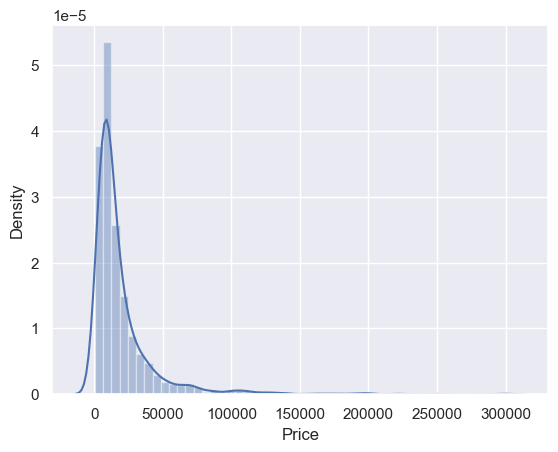

In [18]:
sns.distplot(data_no_mv['Price'])

### DEALING WITH OUTLIERS

In [20]:
q=data_no_mv["Price"].quantile(0.99)

In [21]:
#So there were outliers in price column.To deal with them we can get rid of top 1% of the observation,
#which we did here by quantile method and kept 99% of the observation

In [22]:
data_1=data_no_mv[data_no_mv["Price"]<q]

In [23]:
#Here we kept the Prices that are below "q"

In [24]:
data_1

Brand     Price       Body  Mileage  EngineV Engine Type  \
0               BMW    4200.0      sedan      277      2.0      Petrol   
1     Mercedes-Benz    7900.0        van      427      2.9      Diesel   
2     Mercedes-Benz   13300.0      sedan      358      5.0         Gas   
3              Audi   23000.0  crossover      240      4.2      Petrol   
4            Toyota   18300.0  crossover      120      2.0      Petrol   
...             ...       ...        ...      ...      ...         ...   
4339         Toyota   17900.0      sedan       35      1.6      Petrol   
4340  Mercedes-Benz  125000.0      sedan        9      3.0      Diesel   
4341            BMW    6500.0      sedan        1      3.5      Petrol   
4342            BMW    8000.0      sedan      194      2.0      Petrol   
4344     Volkswagen   13500.0        van      124      2.0      Diesel   

     Registration  Year  
0             yes  1991  
1             yes  1999  
2             yes  2003  
3             yes  2007  
4             yes  2011  
...           ...   ...  
4339          yes  2014  
4340          yes  2014  
4341          yes  1999  
4342          yes  1985  
4344          yes  2013  

[3984 rows x 8 columns]

<Axes: xlabel='Price', ylabel='Density'>

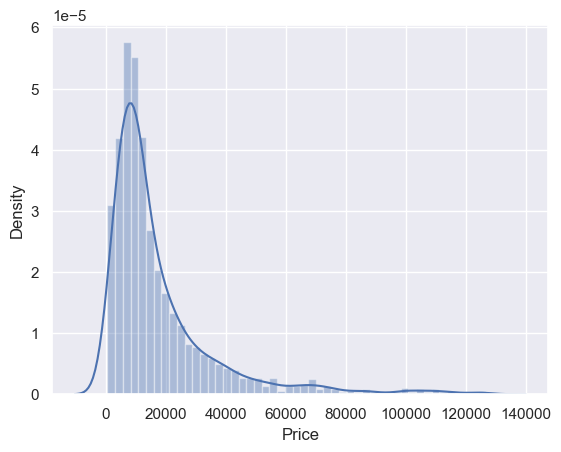

In [25]:
sns.distplot(data_1["Price"])

In [26]:
#so there're still outliers but reduced in number, so we can work with them :)

<Axes: xlabel='Mileage', ylabel='Density'>

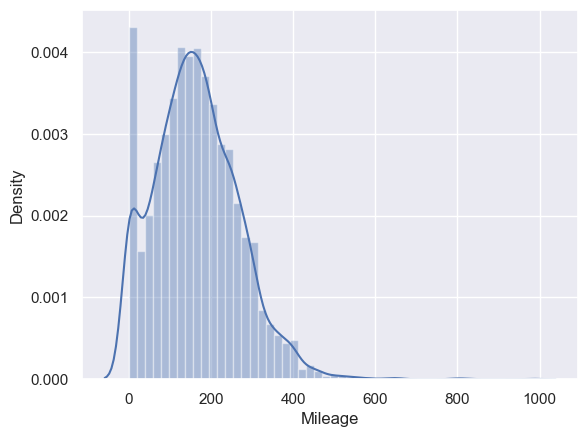

In [27]:
sns.distplot(data_1["Mileage"])

In [28]:
#Mileage has also outliers so repeating same process for this column too

In [29]:
q=data_1["Mileage"].quantile(0.99)
data_2=data_1[data_1["Mileage"]<q]

<Axes: xlabel='Mileage', ylabel='Density'>

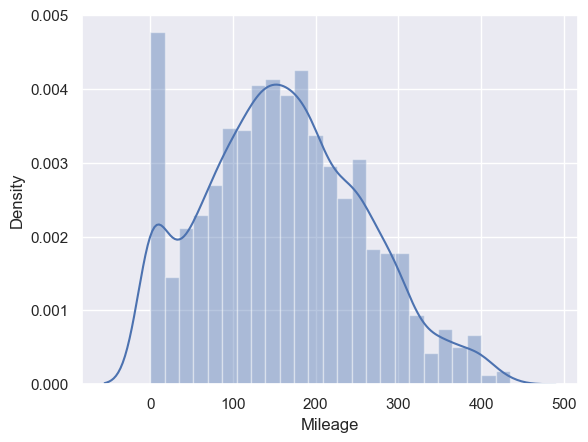

In [30]:
sns.distplot(data_2["Mileage"])

In [31]:
#Same issue for Engine volume :)

<Axes: xlabel='EngineV', ylabel='Density'>

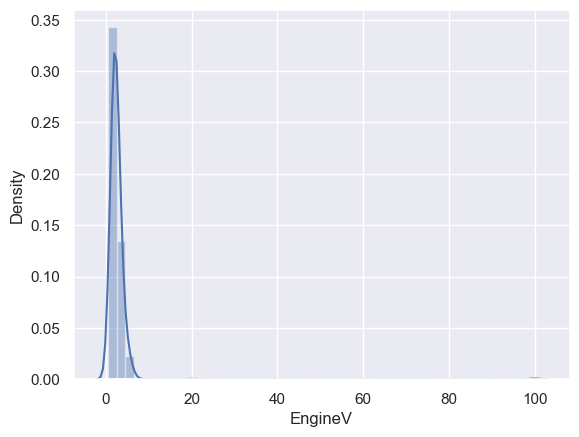

In [32]:
sns.distplot(data_2["EngineV"])

In [33]:
data_3=data_2[data_2['EngineV']<6.5]

In [34]:
#so here engine olume were like 90. 80. 70. which are really wrong
#According to Google, engine volume values range from 0.5 to 6.5, so i'll just keep those values less then 6.5 

<Axes: xlabel='EngineV', ylabel='Density'>

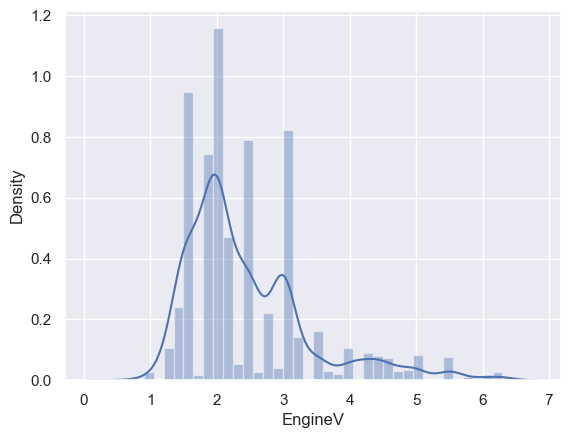

In [35]:
sns.distplot(data_3["EngineV"])

In [36]:
#Checking the "year" now

<Axes: xlabel='Year', ylabel='Density'>

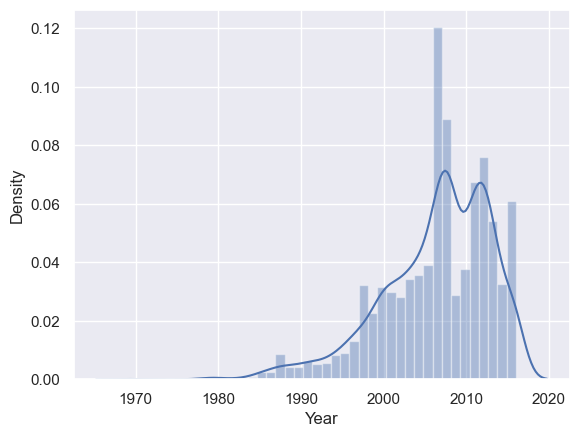

In [37]:
sns.distplot(data_3["Year"])

In [38]:
#Seems like there are some vintage cars but most are f new models lke 2010 or 2020

In [39]:
#This time i'll keep an eye on the new ones 

In [40]:
q=data_3["Year"].quantile(0.01)
data_4=data_3[data_3["Year"]>q]

<Axes: xlabel='Year', ylabel='Density'>

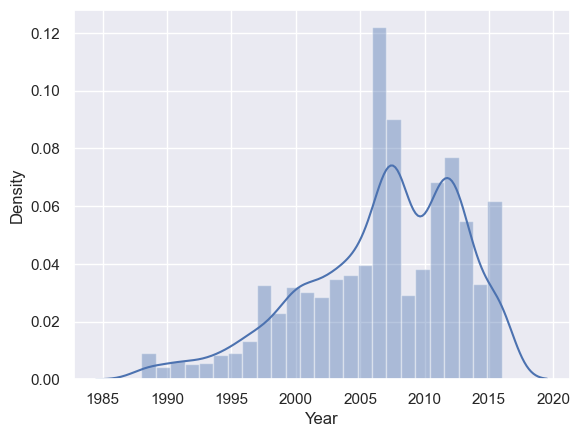

In [41]:
sns.distplot(data_4["Year"])

In [42]:
#Much better!

In [43]:
#DATA IS NOW CLEANED :D

In [44]:
data_cleaned=data_4.reset_index(drop=True)

In [45]:
data_cleaned.describe(include="all")

Brand          Price   Body      Mileage      EngineV  \
count         3867    3867.000000   3867  3867.000000  3867.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           848            NaN   1467          NaN          NaN   
mean           NaN   18194.455679    NaN   160.542539     2.450440   
std            NaN   19085.855165    NaN    95.633291     0.949366   
min            NaN     800.000000    NaN     0.000000     0.600000   
25%            NaN    7200.000000    NaN    91.000000     1.800000   
50%            NaN   11700.000000    NaN   157.000000     2.200000   
75%            NaN   21700.000000    NaN   225.000000     3.000000   
max            NaN  129222.000000    NaN   435.000000     6.300000   

       Engine Type Registration         Year  
count         3867         3867  3867.000000  
unique           4            2          NaN  
top         Diesel          yes          NaN  
freq          1807         3505          NaN  
mean           NaN          NaN  2006.709853  
std            NaN          NaN     6.103870  
min            NaN          NaN  1988.000000  
25%            NaN          NaN  2003.000000  
50%            NaN          NaN  2008.000000  
75%            NaN          NaN  2012.000000  
max            NaN          NaN  2016.000000

### CHECKING OLS ASSUMPTIONS

In [47]:
#Here we'll check linearity between [Price,Year] [Price, EngineV] [Price, Mileage] 

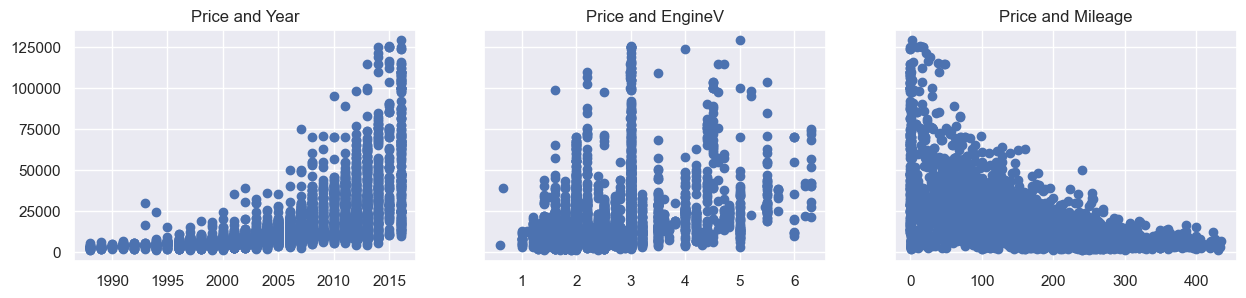

In [48]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title("Price and Year")
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title("Price and EngineV")
ax3.scatter(data_cleaned["Mileage"],data_cleaned["Price"])
ax3.set_title("Price and Mileage")


plt.show()
                             

In [49]:
#We can clearly see all three pattren are not linear, So we'll not use linear regresison 

### RELAXING THE ASSUMPTIONS

In [51]:
#Ok so up there we can see patterns like that are of exponential functions for sure
#To get rid of them we can take the log of the prices:
#why so ? Because "Log " completely vanishes the exponential function 

In [52]:
#WWorking of log function :
# f = e^x
# log of f = log (e^x)
# log of f = x 

In [53]:
# So here we are just left with now x(linear graph ) instead of exponential function 

In [54]:
log_price=np.log(data_cleaned["Price"])
data_cleaned["log_price"]=log_price
data_cleaned=data_cleaned.drop(["Price"],axis=1)
data_cleaned

Brand       Body  Mileage  EngineV Engine Type Registration  \
0               BMW      sedan      277      2.0      Petrol          yes   
1     Mercedes-Benz        van      427      2.9      Diesel          yes   
2     Mercedes-Benz      sedan      358      5.0         Gas          yes   
3              Audi  crossover      240      4.2      Petrol          yes   
4            Toyota  crossover      120      2.0      Petrol          yes   
...             ...        ...      ...      ...         ...          ...   
3862     Volkswagen        van      163      2.5      Diesel          yes   
3863         Toyota      sedan       35      1.6      Petrol          yes   
3864  Mercedes-Benz      sedan        9      3.0      Diesel          yes   
3865            BMW      sedan        1      3.5      Petrol          yes   
3866     Volkswagen        van      124      2.0      Diesel          yes   

      Year  log_price  
0     1991   8.342840  
1     1999   8.974618  
2     2003   9.495519  
3     2007  10.043249  
4     2011   9.814656  
...    ...        ...  
3862  2008   9.350102  
3863  2014   9.792556  
3864  2014  11.736069  
3865  1999   8.779557  
3866  2013   9.510445  

[3867 rows x 8 columns]

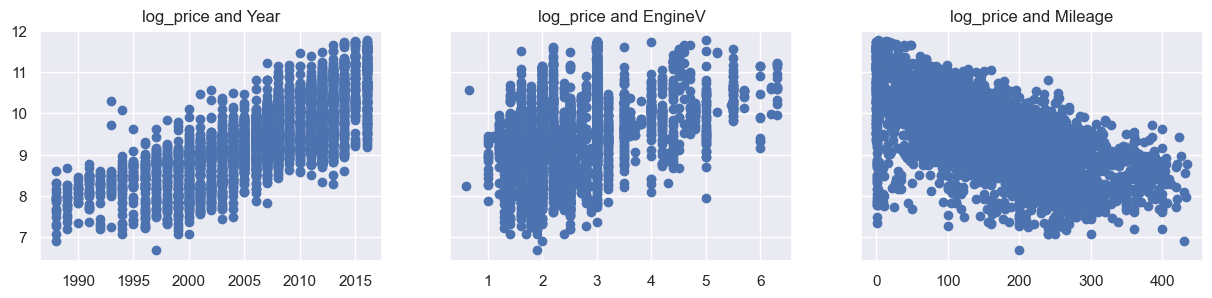

In [55]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title("log_price and Year")
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title("log_price and EngineV")
ax3.scatter(data_cleaned["Mileage"],data_cleaned["log_price"])
ax3.set_title("log_price and Mileage")


plt.show()
                             

### CHECKING MULTICOLLINEARITY 

In [57]:
#Well statsmodels is a v.good option to check multicollinearity 

In [58]:
#One of the best way to check multicollinearity is VIF (Variance Inflation Factor)
# 1 < VIF < 5 Best values for VIF

In [59]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(variables.values,i) for i in range (variables.shape[1])]
vif["features"]=variables.columns

In [61]:
vif

VIF features
0   3.791584  Mileage
1  10.354854     Year
2   7.662068  EngineV

In [62]:
#we can consider EngineV because its VIF values is not that bad as its closer to 5 but Year
# We'll get rid of column "Year" because it has VIF value of >10 which is bad 

In [63]:
data_no_multicollinearity=data_cleaned.drop(['Year'],axis = 1)
data_no_multicollinearity

Brand       Body  Mileage  EngineV Engine Type Registration  \
0               BMW      sedan      277      2.0      Petrol          yes   
1     Mercedes-Benz        van      427      2.9      Diesel          yes   
2     Mercedes-Benz      sedan      358      5.0         Gas          yes   
3              Audi  crossover      240      4.2      Petrol          yes   
4            Toyota  crossover      120      2.0      Petrol          yes   
...             ...        ...      ...      ...         ...          ...   
3862     Volkswagen        van      163      2.5      Diesel          yes   
3863         Toyota      sedan       35      1.6      Petrol          yes   
3864  Mercedes-Benz      sedan        9      3.0      Diesel          yes   
3865            BMW      sedan        1      3.5      Petrol          yes   
3866     Volkswagen        van      124      2.0      Diesel          yes   

      log_price  
0      8.342840  
1      8.974618  
2      9.495519  
3     10.043249  
4      9.814656  
...         ...  
3862   9.350102  
3863   9.792556  
3864  11.736069  
3865   8.779557  
3866   9.510445  

[3867 rows x 7 columns]

### CREATING DUMMY VARIABLES

In [65]:
#If we have like N categories for a feature , e have to make N-1 dummies 
#If we include a separate dummy variable for each category , then we're introducing multicollinearity to regression

In [66]:
data_with_dummies=pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [67]:
data_with_dummies.head()

Mileage  EngineV  log_price  Brand_BMW  Brand_Mercedes-Benz  \
0      277      2.0   8.342840       True                False   
1      427      2.9   8.974618      False                 True   
2      358      5.0   9.495519      False                 True   
3      240      4.2  10.043249      False                False   
4      120      2.0   9.814656      False                False   

   Brand_Mitsubishi  Brand_Renault  Brand_Toyota  Brand_Volkswagen  \
0             False          False         False             False   
1             False          False         False             False   
2             False          False         False             False   
3             False          False         False             False   
4             False          False          True             False   

   Body_hatch  Body_other  Body_sedan  Body_vagon  Body_van  Engine Type_Gas  \
0       False       False        True       False     False            False   
1       False       False       False       False      True            False   
2       False       False        True       False     False             True   
3       False       False       False       False     False            False   
4       False       False       False       False     False            False   

   Engine Type_Other  Engine Type_Petrol  Registration_yes  
0              False                True              True  
1              False               False              True  
2              False               False              True  
3              False                True              True  
4              False                True              True

### Rearrange a Bit

In [69]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [70]:
cols=['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [71]:
cols

['log_price',
 'Mileage',
 'EngineV',
 'Brand_BMW',
 'Brand_Mercedes-Benz',
 'Brand_Mitsubishi',
 'Brand_Renault',
 'Brand_Toyota',
 'Brand_Volkswagen',
 'Body_hatch',
 'Body_other',
 'Body_sedan',
 'Body_vagon',
 'Body_van',
 'Engine Type_Gas',
 'Engine Type_Other',
 'Engine Type_Petrol',
 'Registration_yes']

In [72]:
data_preprocessed=data_with_dummies[cols]

In [73]:
data_preprocessed.head()

log_price  Mileage  EngineV  Brand_BMW  Brand_Mercedes-Benz  \
0   8.342840      277      2.0       True                False   
1   8.974618      427      2.9      False                 True   
2   9.495519      358      5.0      False                 True   
3  10.043249      240      4.2      False                False   
4   9.814656      120      2.0      False                False   

   Brand_Mitsubishi  Brand_Renault  Brand_Toyota  Brand_Volkswagen  \
0             False          False         False             False   
1             False          False         False             False   
2             False          False         False             False   
3             False          False         False             False   
4             False          False          True             False   

   Body_hatch  Body_other  Body_sedan  Body_vagon  Body_van  Engine Type_Gas  \
0       False       False        True       False     False            False   
1       False       False       False       False      True            False   
2       False       False        True       False     False             True   
3       False       False       False       False     False            False   
4       False       False       False       False     False            False   

   Engine Type_Other  Engine Type_Petrol  Registration_yes  
0              False                True              True  
1              False               False              True  
2              False               False              True  
3              False                True              True  
4              False                True              True

# LINEAR REGRESSION MODEL

#### Declare the inputs and the targets

In [76]:
targets=data_with_dummies["log_price"]
inputs=data_with_dummies.drop(['log_price'],axis=1)

#### Scale the Data

In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [79]:
inputs_scaled = scaler.transform(inputs)

#### Train Test Split

In [81]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size = 0.2, random_state = 365)

### CREATE THE REGRESSION

In [83]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [84]:
y_hat = reg.predict(x_train)

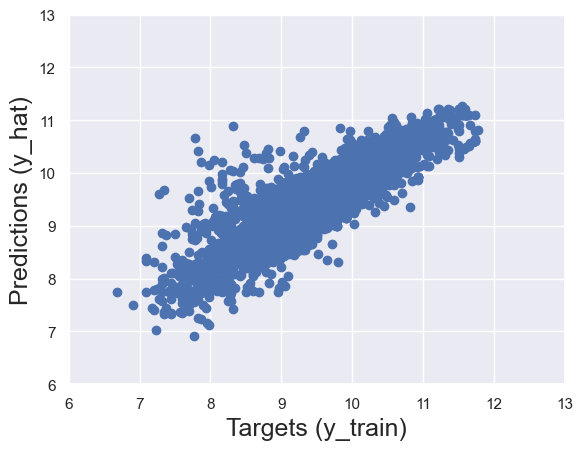

In [85]:
plt.scatter(y_train,y_hat)
plt.xlabel ("Targets (y_train)",size=18)
plt.ylabel ("Predictions (y_hat)",size=18) 
plt.xlim(6,13)
plt.ylim(6,13)

plt.show()

Text(0.5, 1.0, 'Residuals PDF')

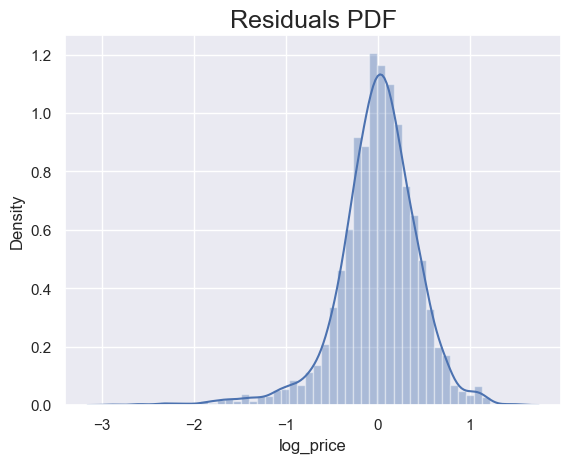

In [86]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF" ,size=18)

In [87]:
reg.score(x_train,y_train)

0.744996578792662

In [88]:
#Our model is explaining 75% of the variability of the data

#### Finding the weights and bias

In [90]:
#bias    == intercept
#weights == coefficient

In [91]:
reg.intercept_

9.415239458021299

In [92]:
reg.coef_

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

In [93]:
reg_summary=pd.DataFrame(inputs.columns.values,columns=["Features"])
reg_summary['Weights']=reg.coef_
reg_summary

Features   Weights
0               Mileage -0.448713
1               EngineV  0.209035
2             Brand_BMW  0.014250
3   Brand_Mercedes-Benz  0.012882
4      Brand_Mitsubishi -0.140552
5         Brand_Renault -0.179909
6          Brand_Toyota -0.060550
7      Brand_Volkswagen -0.089924
8            Body_hatch -0.145469
9            Body_other -0.101444
10           Body_sedan -0.200630
11           Body_vagon -0.129887
12             Body_van -0.168597
13      Engine Type_Gas -0.121490
14    Engine Type_Other -0.033368
15   Engine Type_Petrol -0.146909
16     Registration_yes  0.320473

In [94]:
# +ve weight shows that as a feature increases in value, so do the "log_price" and "Price" respectively.

### Testing the Model

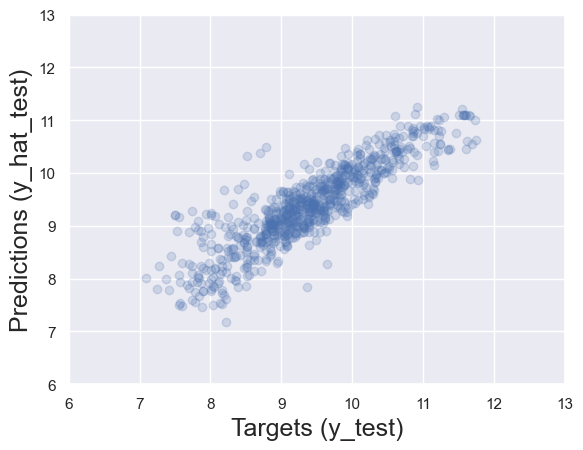

In [96]:
y_hat_test=reg.predict(x_test)

plt.scatter(y_test,y_hat_test,alpha=0.2)
plt.xlabel ("Targets (y_test)",size=18)
plt.ylabel ("Predictions (y_hat_test)",size=18) 
plt.xlim(6,13)

plt.ylim(6,13)

plt.show()


In [97]:
# The more saturated the color, the higher the concentration 

In [98]:
df_performance=pd.DataFrame(y_hat_test,columns = ['Prediction'])
df_performance
                            

Prediction
0      9.276643
1      8.160305
2      8.929738
3      8.917842
4      9.337280
..          ...
769   10.297276
770    9.280992
771    9.541258
772   10.221496
773    9.509790

[774 rows x 1 columns]

In [99]:
# These are the log prices
# Converting them itno exponential

In [100]:
df_performance=pd.DataFrame(np.exp(y_hat_test),columns = ['Prediction'])
df_performance.head()

Prediction
0  10685.501696
1   3499.255242
2   7553.285218
3   7463.963017
4  11353.490075

In [101]:
df_performance['Target']=np.exp(y_test)
df_performance

Prediction  Target
0    10685.501696     NaN
1     3499.255242  7900.0
2     7553.285218     NaN
3     7463.963017     NaN
4    11353.490075     NaN
..            ...     ...
769  29651.726363  6950.0
770  10732.071179     NaN
771  13922.446953     NaN
772  27487.751303     NaN
773  13491.163043     NaN

[774 rows x 2 columns]

In [102]:
#Here we have a lot of missing values

In [103]:
y_test=y_test.reset_index(drop=True)

In [104]:
y_test.head()

0    7.740664
1    7.937375
2    7.824046
3    8.764053
4    9.121509
Name: log_price, dtype: float64

In [105]:
df_performance['Target']=np.exp(y_test)
df_performance

Prediction   Target
0    10685.501696   2300.0
1     3499.255242   2800.0
2     7553.285218   2500.0
3     7463.963017   6400.0
4    11353.490075   9150.0
..            ...      ...
769  29651.726363  29500.0
770  10732.071179   9600.0
771  13922.446953  18300.0
772  27487.751303  68500.0
773  13491.163043  10800.0

[774 rows x 2 columns]

In [106]:
df_performance["Residual"]=df_performance["Target"] - df_performance["Prediction"]


In [107]:
df_performance["Difference%"]=np.absolute(df_performance["Residual"]/df_performance["Target"] * 100)

In [108]:
df_performance

Prediction   Target      Residual  Difference%
0    10685.501696   2300.0  -8385.501696   364.587030
1     3499.255242   2800.0   -699.255242    24.973402
2     7553.285218   2500.0  -5053.285218   202.131409
3     7463.963017   6400.0  -1063.963017    16.624422
4    11353.490075   9150.0  -2203.490075    24.081859
..            ...      ...           ...          ...
769  29651.726363  29500.0   -151.726363     0.514327
770  10732.071179   9600.0  -1132.071179    11.792408
771  13922.446953  18300.0   4377.553047    23.921055
772  27487.751303  68500.0  41012.248697    59.871896
773  13491.163043  10800.0  -2691.163043    24.918176

[774 rows x 4 columns]

In [109]:
df_performance.describe()

Prediction         Target      Residual  Difference%
count    774.000000     774.000000    774.000000   774.000000
mean   15946.760167   18165.817106   2219.056939    36.256693
std    13133.197604   19967.858908  10871.218143    55.066507
min     1320.562768    1200.000000 -29456.498331     0.062794
25%     7413.644234    6900.000000  -2044.191251    12.108022
50%    11568.168859   11600.000000    142.518577    23.467728
75%    20162.408805   20500.000000   3147.343497    39.563570
max    77403.055224  126000.000000  85106.162329   512.688080

In [110]:
pd.options.display.max_rows = 999
pd.options.display.float_format = '{:.2f}'.format

df_performance.sort_values(by=['Difference%'])

Prediction    Target  Residual  Difference%
698    30480.85  30500.00     19.15         0.06
742    16960.31  16999.00     38.69         0.23
60     12469.21  12500.00     30.79         0.25
110    25614.14  25500.00   -114.14         0.45
367    42703.68  42500.00   -203.68         0.48
369     3084.69   3100.00     15.31         0.49
769    29651.73  29500.00   -151.73         0.51
272     9749.53   9800.00     50.47         0.52
714    23118.07  22999.00   -119.07         0.52
630     8734.58   8800.00     65.42         0.74
380     3473.79   3500.00     26.21         0.75
648    21174.10  21335.00    160.90         0.75
308     8967.74   8900.00    -67.74         0.76
665    17858.02  18000.00    141.98         0.79
379    17654.84  17800.00    145.16         0.82
719    11391.95  11500.00    108.05         0.94
102    28625.56  28900.00    274.44         0.95
94      7724.17   7800.00     75.83         0.97
561     6429.03   6500.00     70.97         1.09
242     7597.39   7500.00    -97.39         1.30
528    18555.09  18800.00    244.91         1.30
61      7396.87   7300.00    -96.87         1.33
19     16178.14  16400.00    221.86         1.35
280    12327.10  12499.00    171.90         1.38
311    51287.19  52055.25    768.06         1.48
723     6009.63   6100.00     90.37         1.48
49      4973.17   4900.00    -73.17         1.49
114    27716.14  27300.00   -416.14         1.52
636    28498.91  28950.00    451.09         1.56
612     2953.17   3000.00     46.83         1.56
47     26425.14  25999.00   -426.14         1.64
23     13111.91  12900.00   -211.91         1.64
31     12858.08  12650.00   -208.08         1.64
91     13421.16  13200.00   -221.16         1.68
329     7327.18   7200.00   -127.18         1.77
549     3816.33   3750.00    -66.33         1.77
252     9721.50   9900.00    178.50         1.80
387    44173.72  44999.00    825.28         1.83
267    40753.58  40000.00   -753.58         1.88
467    22262.80  22711.65    448.85         1.98
556    18231.44  18600.00    368.56         1.98
165     9596.94   9400.00   -196.94         2.10
259     6067.79   6200.00    132.21         2.13
601    35371.16  34600.00   -771.16         2.23
708    11967.39  11700.00   -267.39         2.29
593    17908.00  17500.00   -408.00         2.33
398     8707.13   8500.00   -207.13         2.44
526    29049.27  28350.00   -699.27         2.47
603    14513.46  14900.00    386.54         2.59
53     20453.89  21000.00    546.11         2.60
632    15383.35  14990.00   -393.35         2.62
533    24642.50  24000.00   -642.50         2.68
497    50099.92  51500.00   1400.08         2.72
212    16133.86  15700.00   -433.86         2.76
130    17489.92  18000.00    510.08         2.83
290     1894.40   1950.00     55.60         2.85
78     30810.25  29900.00   -910.25         3.04
642     8721.97   8999.00    277.03         3.08
437    18866.50  18300.00   -566.50         3.10
101     5958.63   6150.00    191.37         3.11
314     5811.74   6000.00    188.26         3.14
150     9800.43   9500.00   -300.43         3.16
565     7324.63   7100.00   -224.63         3.16
574    12583.52  13000.00    416.48         3.20
591    10115.13   9800.00   -315.13         3.22
172    11156.38  10800.00   -356.38         3.30
133     9279.28   9600.00    320.72         3.34
480    31369.37  32500.00   1130.63         3.48
87      2315.71   2400.00     84.29         3.51
11      5175.77   5000.00   -175.77         3.52
43     21611.83  22400.00    788.17         3.52
96      7976.26   7700.00   -276.26         3.59
406    24874.86  23999.00   -875.86         3.65
173    36516.35  37900.00   1383.65         3.65
540     4666.05   4500.00   -166.05         3.69
40     18672.68  18000.00   -672.68         3.74
340    14815.83  15400.00    584.17         3.79
239    10581.62  10999.00    417.38         3.79
109    12663.54  12200.00   -463.54         3.80
256     1825.44   1900.00     74.56         3.92
317    12247.90  12750.00    502.10 